In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
### Creating own Dataset

np.random.seed(42) ## Works like random state, which hold on to the sequence
x = np.random.rand(100,1)-0.5  
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100) 

df = pd.DataFrame()
df['X'] = x.reshape(100)
df['Y'] = y
df

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


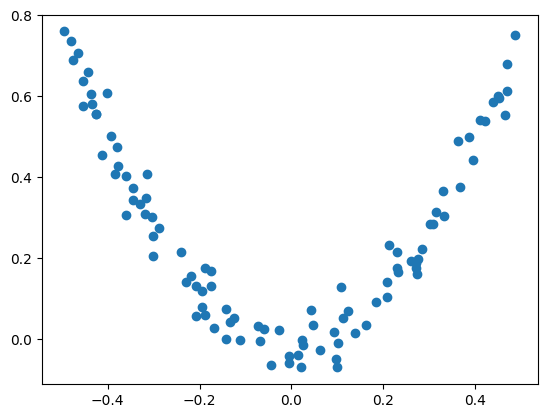

In [5]:
## Plotting the data

plt.scatter(df.X,df.Y)

In [7]:
## We will be implementing the Gradient Boosting Regressor Algo using 3 Basic Models M1, M2, M3, and the final
## will be the addition of the output of each model.
## Final_Pred = m1_pred + learning_rate* m2_pred + learning_rate * m3_pred

In [9]:
## Model M1 Predictions

## Since the Model 1 Pred is nothing but the mean of the output hence we can simply final mean of df.Y

In [11]:
df['pred1'] = df.Y.mean() # M1 Prediciton

df   # Checking the result

,X,Y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [13]:
## Finding the Error by Model 1 i.e Residual = Actual - Predicted

df['res1'] = df.Y - df.pred1

df

,X,Y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


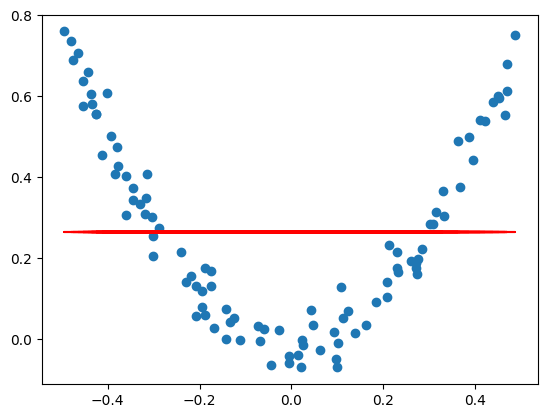

In [17]:
## Plot the Model1 Result

plt.scatter(x=df.X, y=df.Y)
plt.plot(df.X,df.pred1, 'red')
plt.show()

In [19]:
## Clearly it will be a straight line only as all values are same

In [21]:
## Now we will create the Model 2 which we will be a Decision Tree Regressor and the input to this M2 will be
## df.X and wrong predictions done by Model M1, i.e df.res1

In [33]:
## M2 Model Prediction

from sklearn.tree import DecisionTreeRegressor , plot_tree

tree1 = DecisionTreeRegressor(max_leaf_nodes=8) ## We prefer DT with long depth here 

tree1.fit(df.X.values.reshape(100,1), df.res1.values.reshape(100,1))

DecisionTreeRegressor(max_leaf_nodes=8)

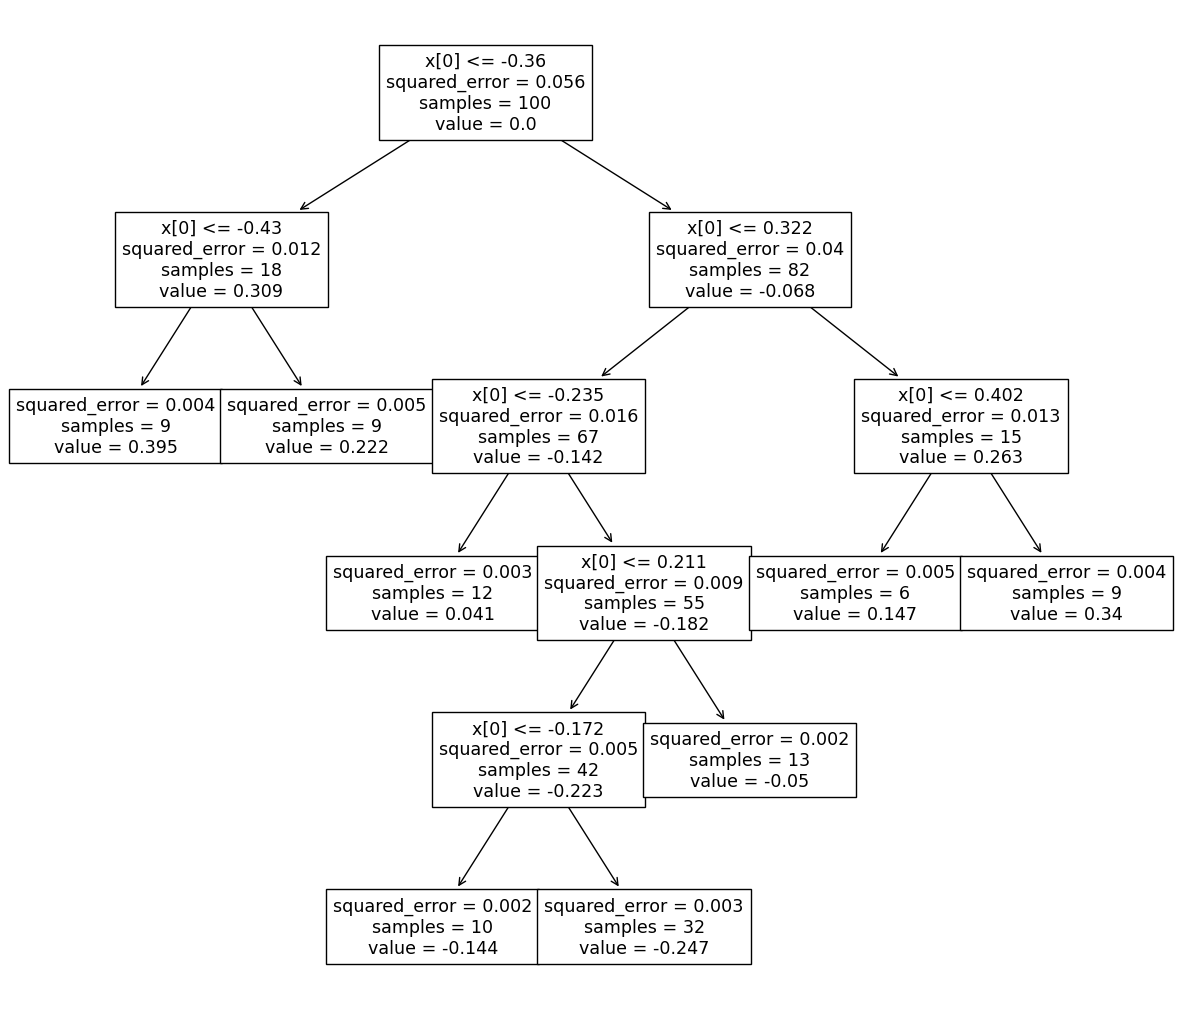

In [35]:
## Plotting the M2 (logic) Decision tree Regressor

plt.figure(figsize=(15,13))
plot_tree(tree1)
plt.show()

In [37]:
## Creating x_test to predict the output 

x_test = np.linspace(-0.5, 0.5, 500)

In [39]:
## Testing the Model M2 on testing data >> m1 + learning_rate * m2
## we are keeping learning_rate = 1

y_pred_1 = 0.265458 + tree1.predict(x_test.reshape(500,1))

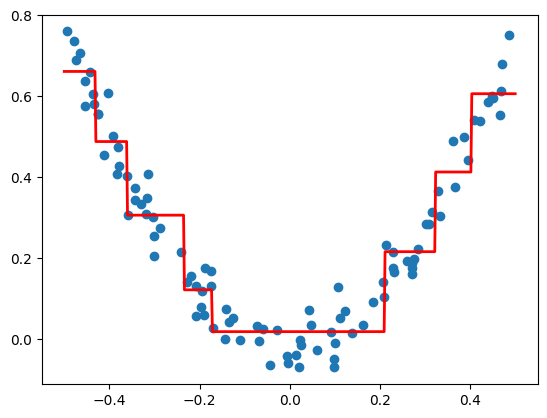

In [41]:
## Plotting M2 prediction

plt.plot(x_test,y_pred_1, linewidth = 2, color='red')
plt.scatter(df.X, df.Y)
plt.show()

In [43]:
## Calculating the prediction on Training Data 

df['pred2'] = 0.265458 + tree1.predict(df.X.values.reshape(100,1)) 

df

,X,Y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [45]:
## Creating Loss of Model 2 = Actual - Predicted

df['res2'] = df.Y - df.pred2
df

,X,Y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [49]:
## Creating Model3 > Decision Tree Regressor with input a df.X and df.res2(error done by Model 2)

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

tree2.fit(df.X.values.reshape(-1,1), df.res2.values.reshape(-1,1))

DecisionTreeRegressor(max_leaf_nodes=8)

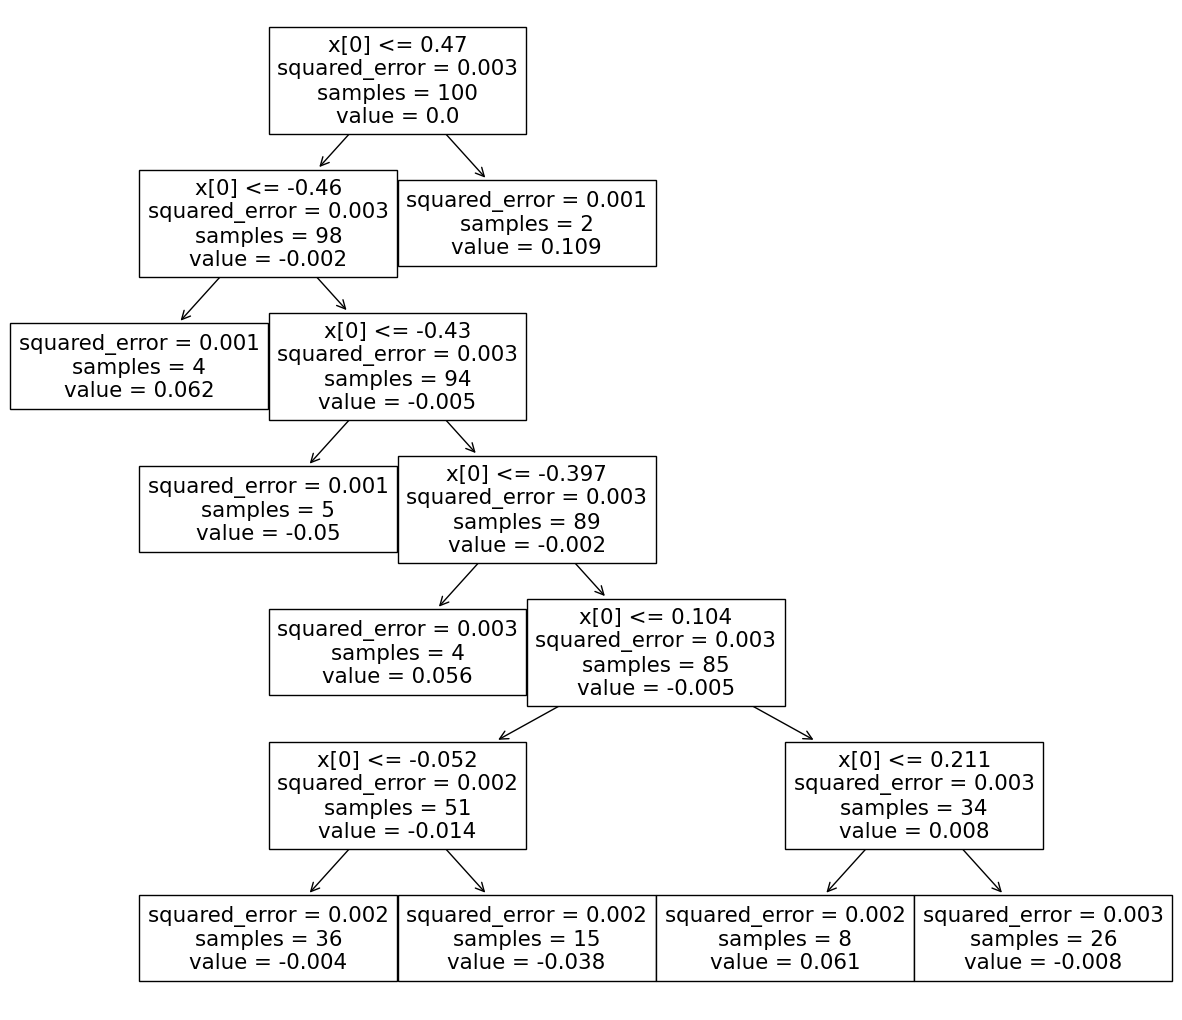

In [51]:
## Plotting the M3 Logic (DT)

plt.figure(figsize=(15,13))
plot_tree(tree2)
plt.show()

In [59]:
## Calculating Predictions on Test data, (x_test)

## Testing the Model M2 on testing data >> m1 + learning_rate * m2 + learning_rate* m3
## we are keeping learning_rate = 1

y_pred_2 = 0.265458 + sum(i.predict(x_test.reshape(-1,1)) for i in [tree1,tree2])

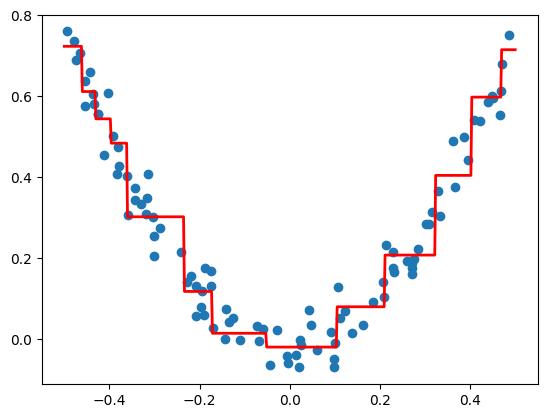

In [61]:
## Plotting M2 prediction

plt.plot(x_test,y_pred_2, linewidth = 2, color='red')
plt.scatter(df.X, df.Y)
plt.show()

In [ ]:
## So results are getting better than M2 Model 